## Representation of a precession waveform into the five harmonics
### This notebook shows examples of the representation of precessing waveforms based on harmonic modes (Fairhurst et al. Phys. Rev. D 102, 024055) and their contribution in various orientations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from harmonics_waveforms import * 
from conversions import *
from plot_fun import *

from pycbc.types.timeseries import TimeSeries
from pycbc import pnutils

In [3]:
approx = 'IMRPhenomPv2'

M = 40.
q = 6.
mass1 = M * q / (1 + q)
mass2 = M * 1. / (1 + q) 

# spins and orientations            
cp_0 = 0.6
ce_0 = 0.

flow = 8.0
fhigh = 2048.

# IMRPhenomD is only used in calculating the approximate length
duration = pnutils.get_imr_duration(mass1, mass2, ce_0, 0., flow, approximant = 'IMRPhenomD')
tlen = 2**np.ceil(np.log2(duration))

df = 1./tlen
flen = int(fhigh/df) + 1

## Generate the harmonics

In [4]:
harm = [0, 1, 2, 3, 4]

In [5]:
chi1 = np.sqrt(cp_0**2 + ce_0**2)
theta1 = np.arctan2(cp_0, ce_0)
a_1 = chi1
a_2 = 0.
tilt_1 = theta1
tilt_2 = 0.
phi_12 = 0.
fref = flow
beta = calculate_opening_angle(mass1, mass2, ce_0, cp_0, fref)
distance = 1.

In [6]:
harmonics = calculate_precessing_harmonics(mass1, mass2, a_1, a_2, tilt_1, tilt_2, phi_12, beta, 
                                                distance, harm, approx, fref, flow, fhigh, df, flen)

## Case-A: Face on waveform, contains 0 and 4 harmonics

In [7]:
waveforms = {}
coeffs = {}

In [8]:
w = waveforms['face_on'] = {}
w['0'] =  make_single_spin_waveform(approx, 0., 0., 0., 0., ce_0, cp_0, mass1, mass2, flow, df, flen) 
w['\pi/4'] =  make_single_spin_waveform(approx, 0., 0., np.pi/4, np.pi/4, ce_0, cp_0, mass1, mass2, flow, df, flen)

In [9]:
c = coeffs['face_on'] = {}
c[0] = 1.
c[4] = 1.

## Plot the waveforms and the harmonics

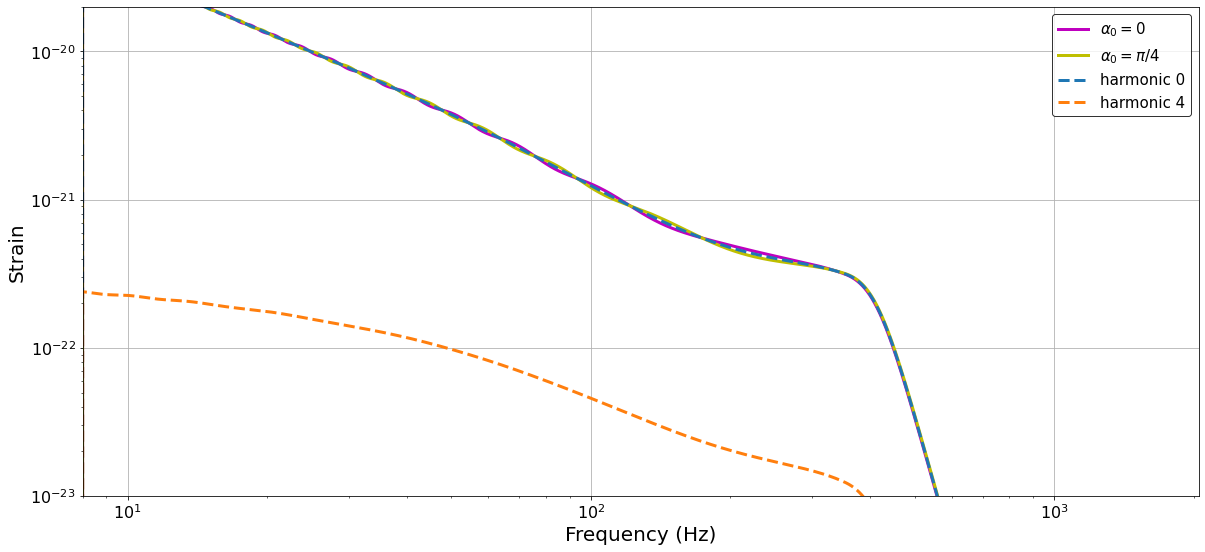

In [10]:
plot_waveform_harmonics(w, harmonics, c, flow, fname = 'face_on_harmonic_content')

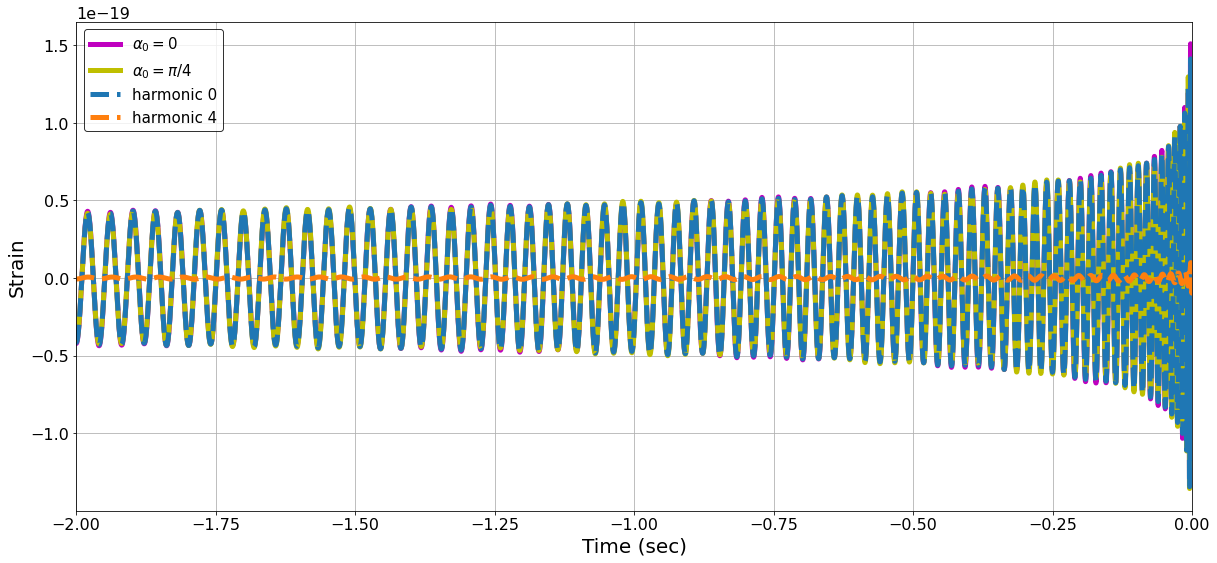

In [11]:
plot_waveform_harmonics_td(w, harmonics, c, fname = 'face_on_harmonic_content')

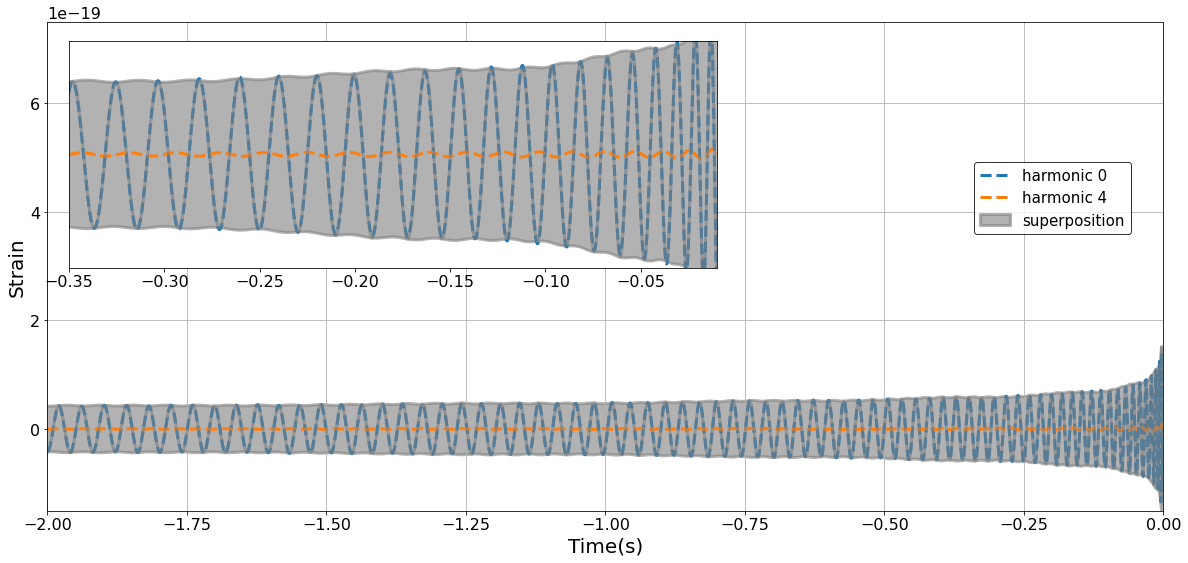

In [12]:
plot_waveform_harmonics_superposition_td(w, harmonics, c, fname = 'face_on_harmonic_content')

### First order

Based on the calculated waveform, the edge-on, cross polarized waveform has $b \exp[i \phi_{JL}] + b^{3} \exp[3i \phi_{JL}]$ terms, so we can isolate the leading one using $h(\phi_{JL} = 0) + i h(\phi_{JL} = \pi/2)$.

In [13]:
w = waveforms['edge_on_cross'] = {}

In [14]:
w['0'] =  make_single_spin_waveform(approx, np.pi/2, 0, np.pi/4, np.pi/4, ce_0, cp_0, 
                                         mass1, mass2, flow, df, flen) 
w['\pi/2'] =  make_single_spin_waveform(approx, np.pi/2, np.pi/2, 0., np.pi/4, ce_0, 
                                             cp_0, mass1, mass2, flow, df, flen)

In [15]:
c = coeffs['edge_on_cross'] = {}
c[1] = 2.
c[3] = 2.

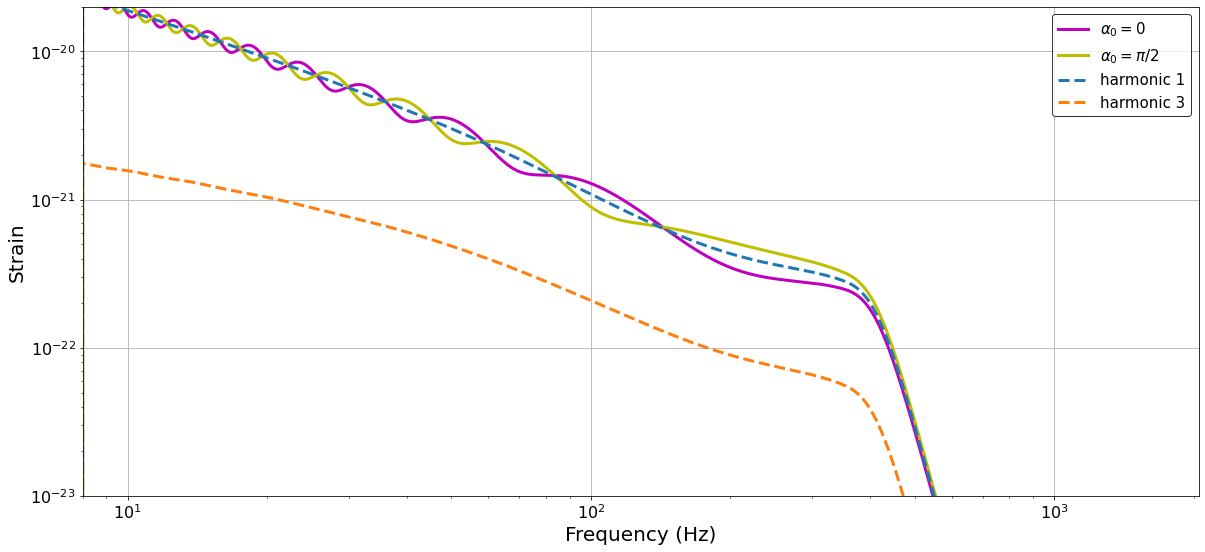

In [16]:
plot_waveform_harmonics(w, harmonics, c, flow, fname = 'edge_on_cross_harmonics')

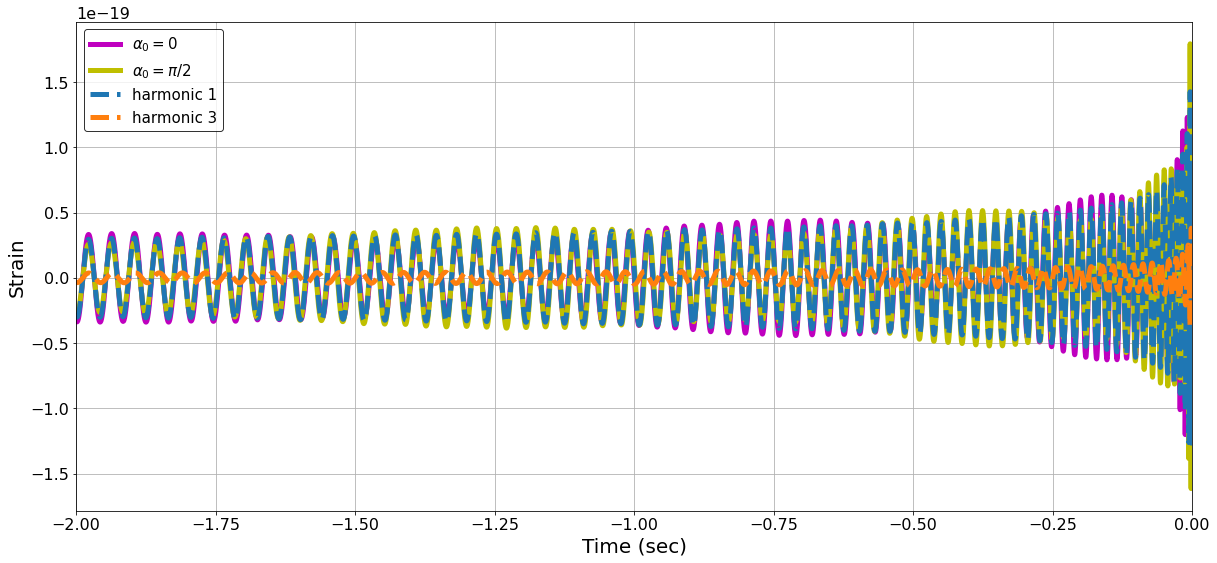

In [17]:
plot_waveform_harmonics_td(w, harmonics, c, fname = 'edge_on_crosss_harmonics')

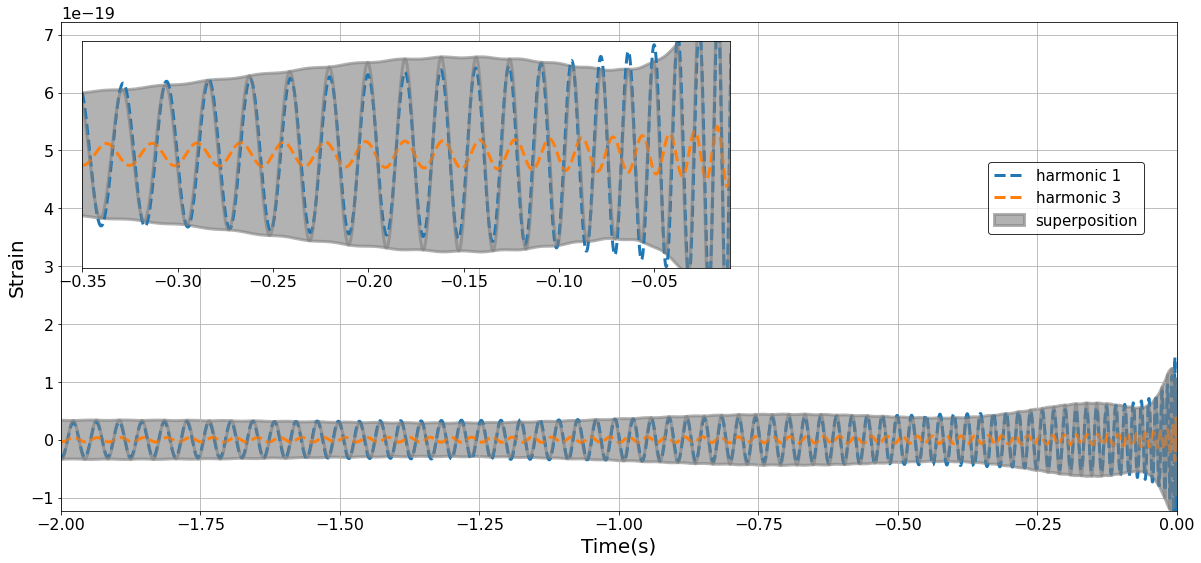

In [18]:
plot_waveform_harmonics_superposition_td(w, harmonics, c, fname = 'edge_on_crosss_harmonics')

### Second order

The second order arises in the plus waveform for an edge on system.   There, we have
$1 + 6b^{2}\exp[2i \phi_{JL}] + b^{4}\exp[4i \phi_{JL}]$.  So, we should calculate $h(\phi_{JL} = 0) - h(\phi_{JL} = \pi)$.

In [19]:
w = waveforms['edge_on_plus'] = {}
w['0'] =  make_single_spin_waveform(approx, np.pi/2, 0, 0., 0.,ce_0, cp_0,
                                         mass1, mass2, flow, df, flen) 
w['\pi/4'] =  make_single_spin_waveform(approx, np.pi/2, np.pi/4, np.pi/4, 0., ce_0, cp_0, 
                                             mass1, mass2, flow, df, flen) 

In [20]:
c = coeffs['edge_on_plus'] = {}
c[0] = 0.5
c[2] = 3
c[4] = 0.5

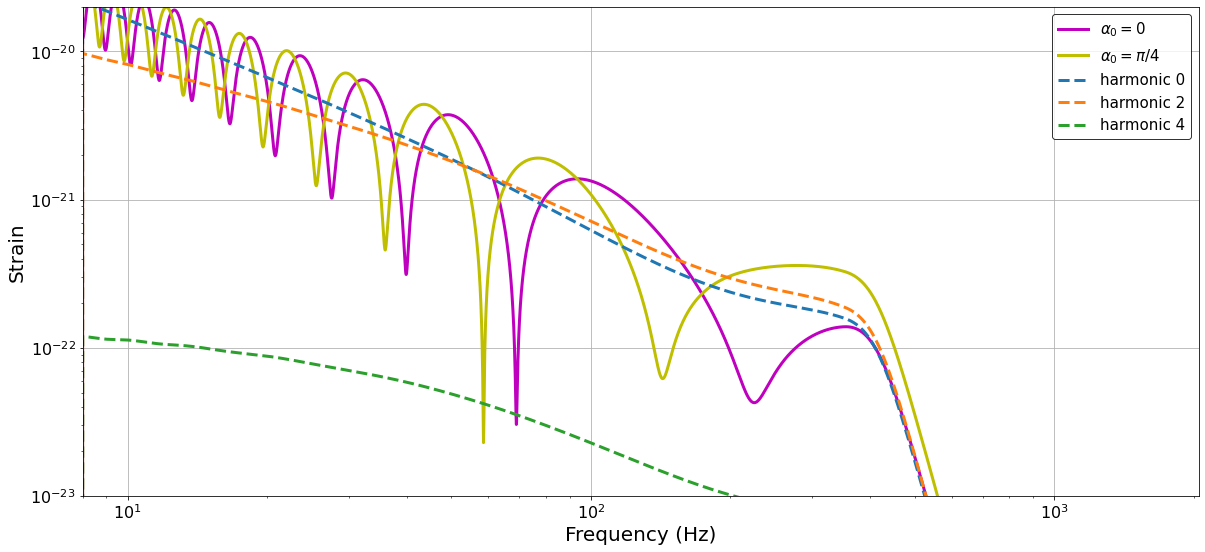

In [21]:
plot_waveform_harmonics(w, harmonics, c, flow, fname = 'edge_on_plus_harmonics')

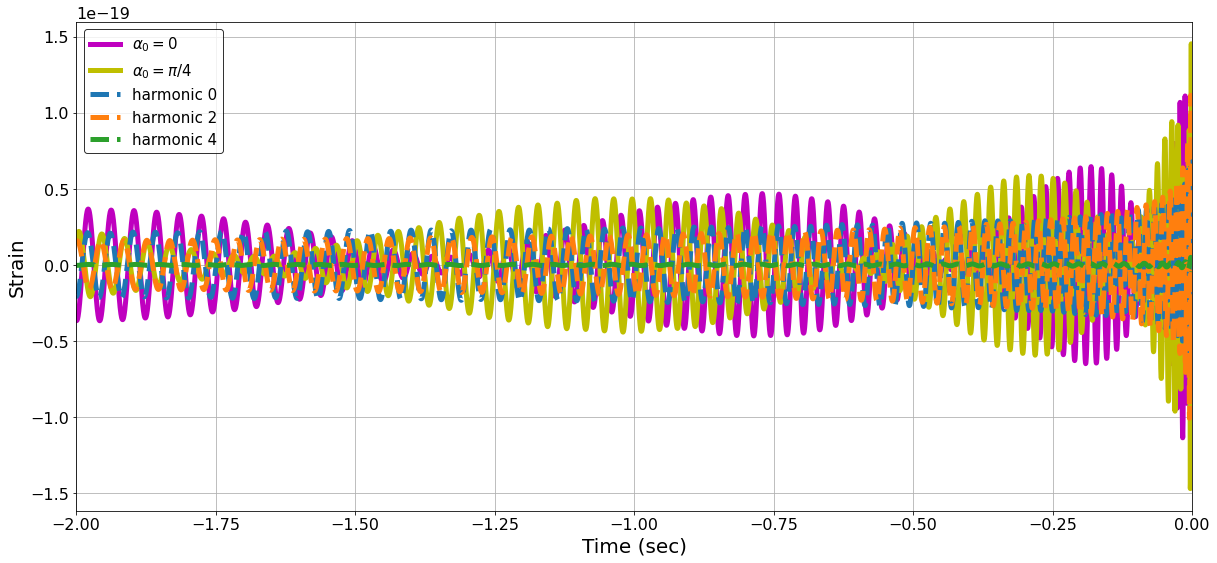

In [22]:
plot_waveform_harmonics_td(w, harmonics, c, fname = 'edge_on_plus_harmonics')

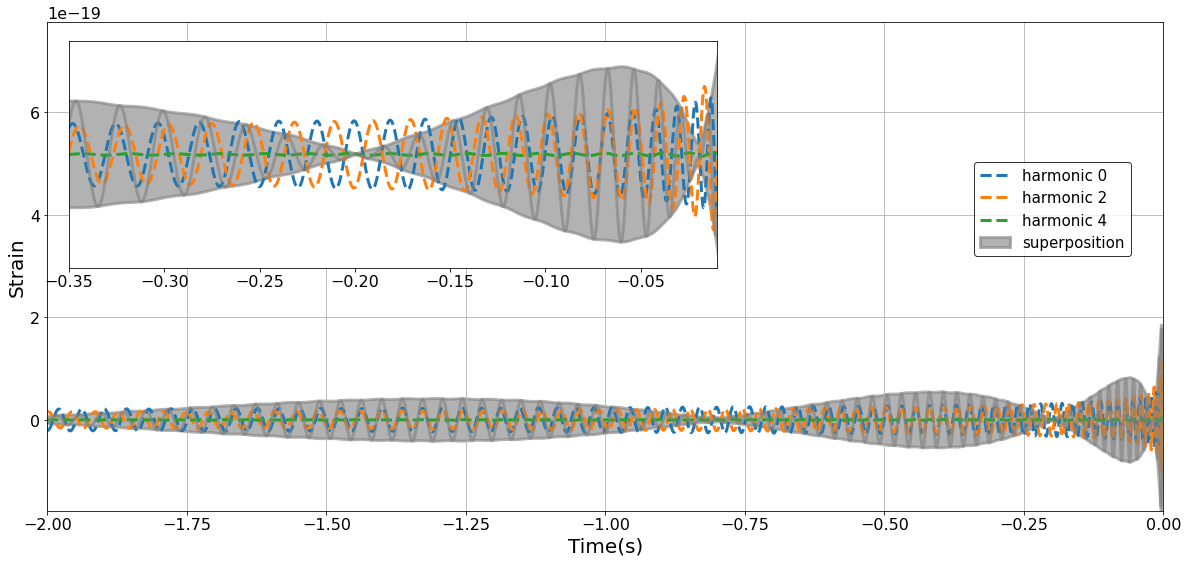

In [23]:
plot_waveform_harmonics_superposition_td(w, harmonics, c, fname = 'edge_on_plus_harmonics')

## An orientation where h0 and h1 contribute strongly

Cross polarized, 45 degree inclination

In [24]:
w = waveforms['45_deg_cross'] = {}
w['0'] =  make_single_spin_waveform(approx, np.pi/4, 0, 0., np.pi/4, ce_0, cp_0, 
                                         mass1, mass2, flow, df, flen) 
w['\pi/2'] =  make_single_spin_waveform(approx, np.pi/4, np.pi/2, 0., np.pi/4, ce_0, cp_0, 
                                             mass1, mass2, flow, df, flen)

In [25]:
c = coeffs['45_deg_cross'] = {}
c[0] = c[4] = np.cos(np.radians(45.))
c[1] = c[3] = 2 * np.sin(np.radians(45.))

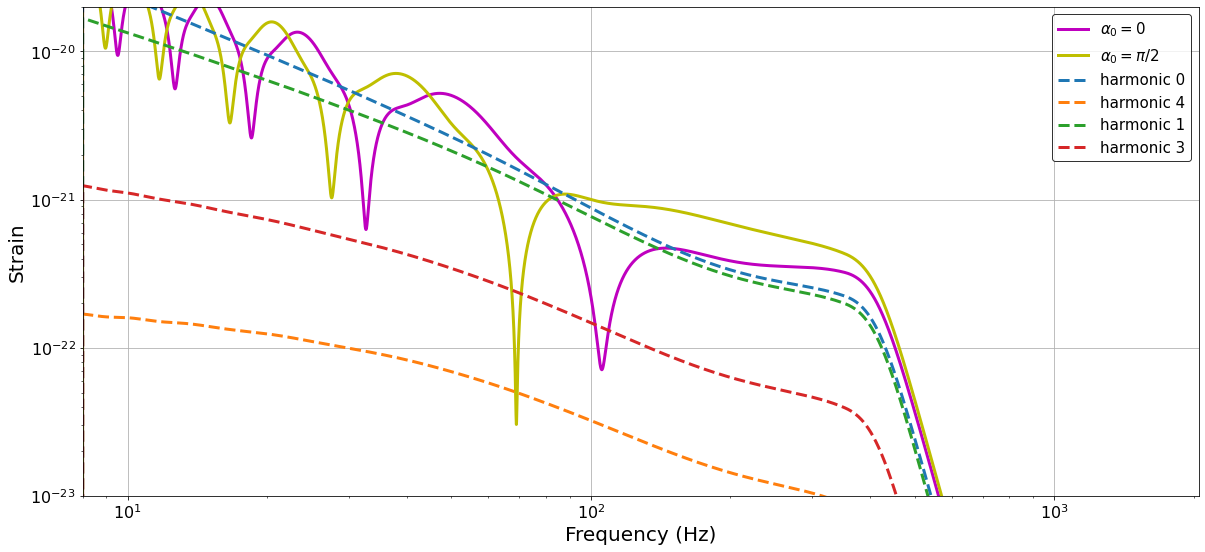

In [26]:
plot_waveform_harmonics(w, harmonics, c, flow, fname = '45_deg_cross_harmonics')

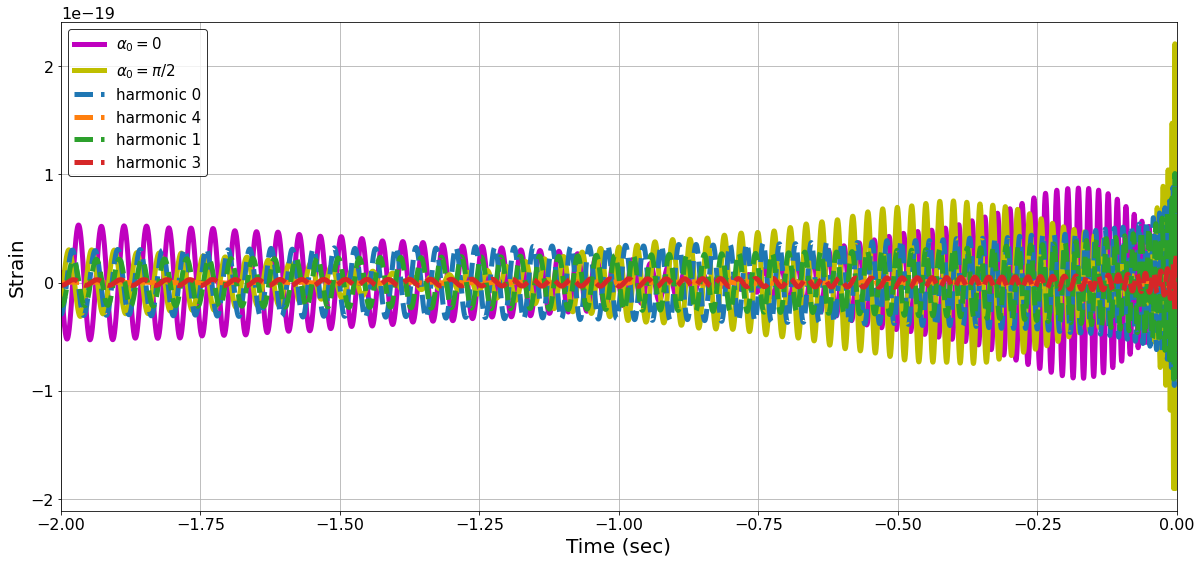

In [27]:
plot_waveform_harmonics_td(w, harmonics, c, fname = '45_deg_cross_harmonics')

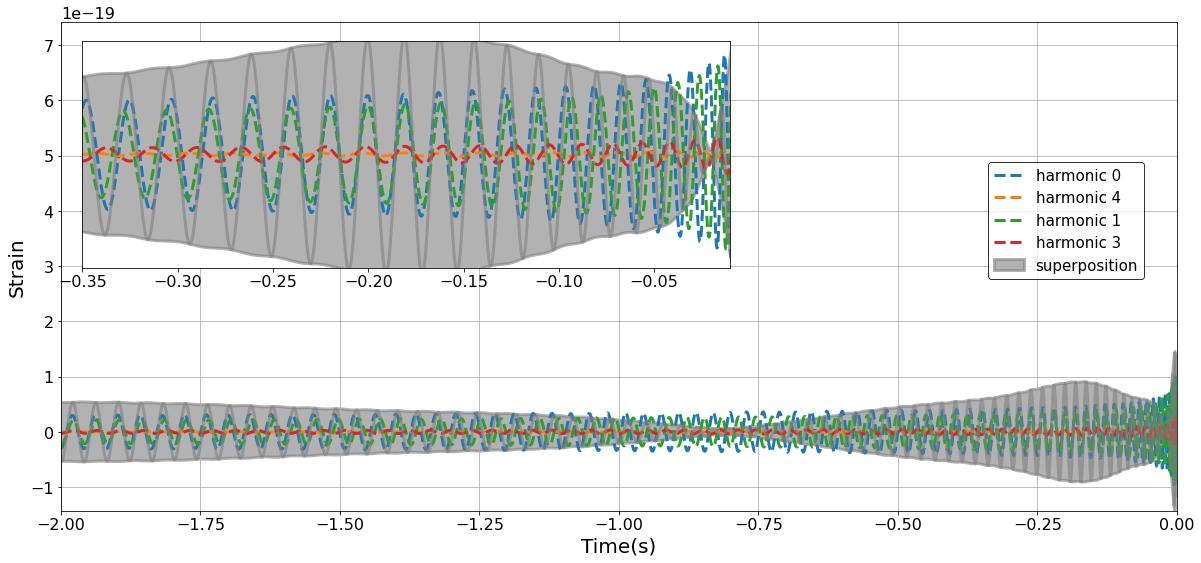

In [28]:
plot_waveform_harmonics_superposition_td(w, harmonics, c, fname = '45_deg_cross_harmonics')

### The five harmonics of the waveform

In [29]:
c = coeffs['unity'] = {}

for i in range(5):
    c[i] = 1.

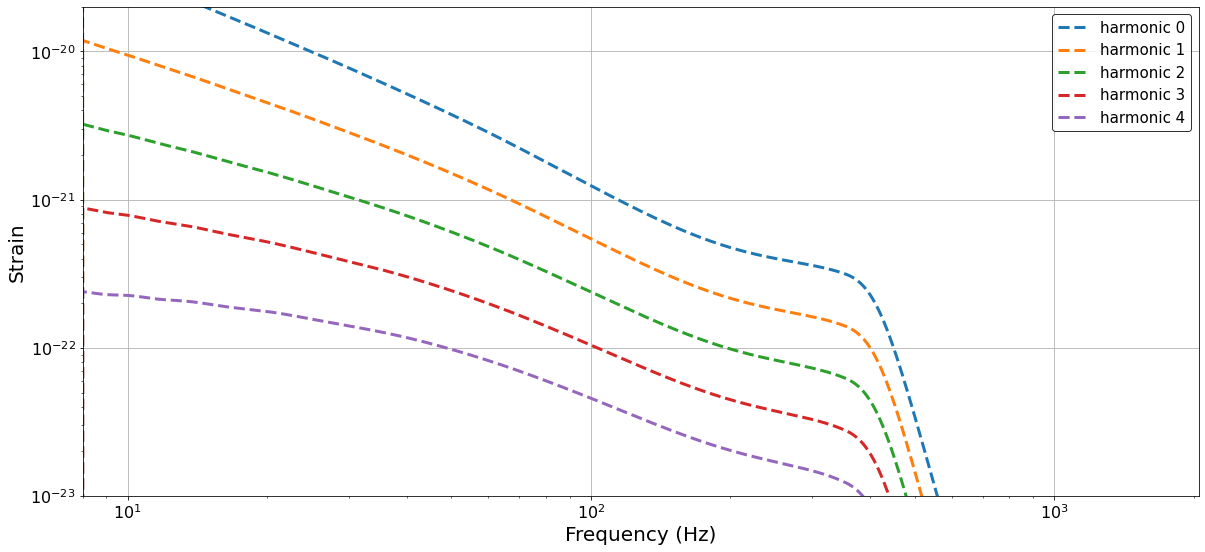

In [30]:
plot_waveform_harmonics({}, harmonics, c, flow, fname = 'waveform_harmonics')

In [31]:
from pycbc.psd import aLIGOZeroDetHighPower
from pycbc.filter.matchedfilter import sigma

In [32]:
psd = aLIGOZeroDetHighPower(flen, df, flow)

In [33]:
def calculate_b(harm, flow, psd):
    
    b = sigma(harm[1], psd, low_frequency_cutoff = flow)/sigma(harm[0], psd, low_frequency_cutoff = flow)
    
    return b

In [34]:
b = calculate_b(harmonics, flow, psd)

In [35]:
print(b)

0.3982400058018955


In [36]:
c = coeffs['b_weighted'] = {}

for i in range(5):
    c[i] = b**(-i)

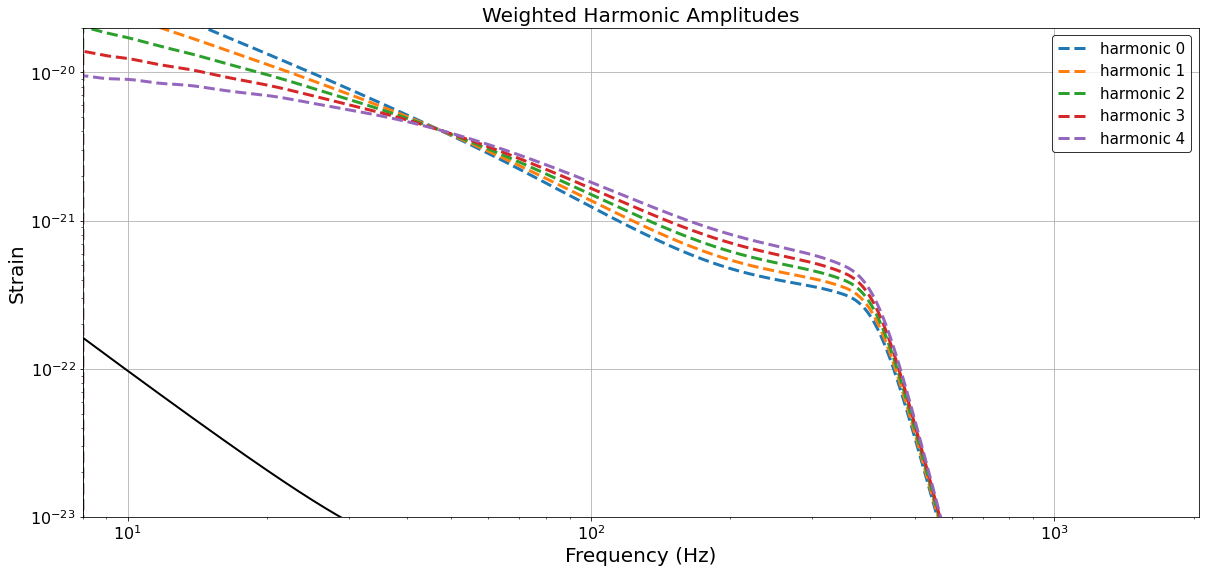

In [37]:
plot_waveform_harmonics({}, harmonics, c, flow, title = 'Weighted Harmonic Amplitudes')
plt.loglog(psd.get_sample_frequencies(), np.sqrt(psd), 'k')

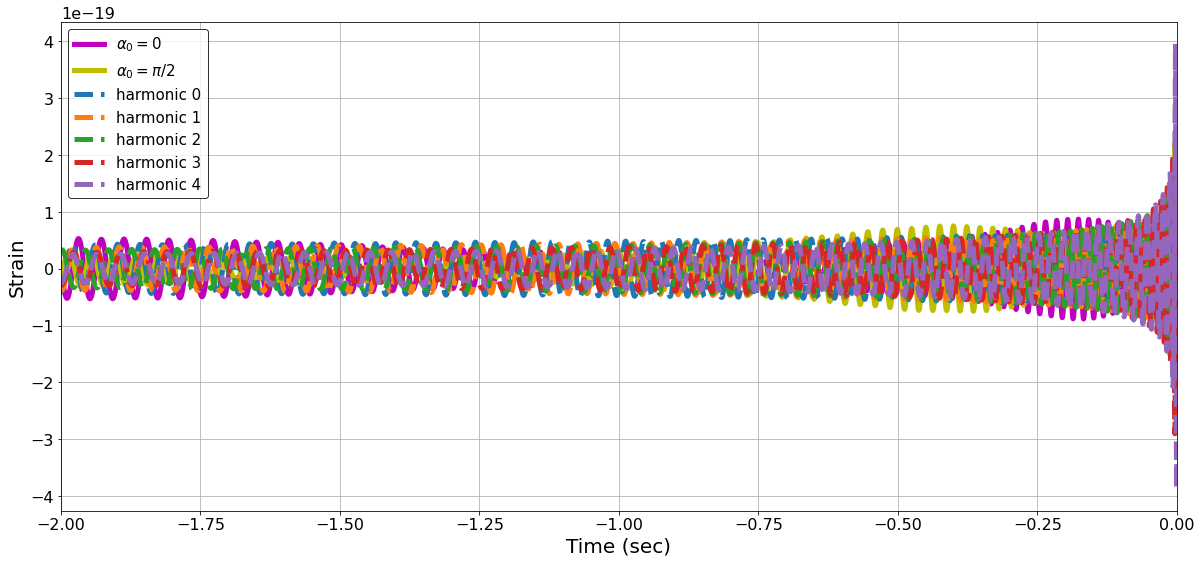

In [40]:
plot_waveform_harmonics_td(w, harmonics, c, fname = 'edge_on_plus_harmonics')

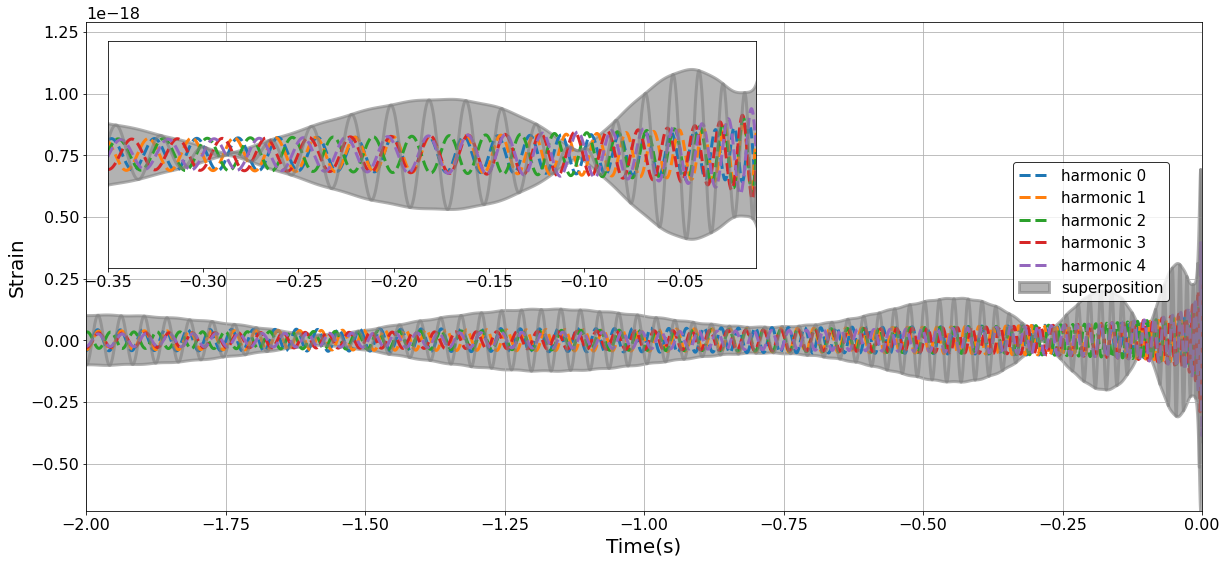

In [39]:
plot_waveform_harmonics_superposition_td(w, harmonics, c, fname = 'edge_on_plus_harmonics')